In [ ]:
# Bước 1: Chuẩn bị dữ liệu

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
df = pd.read_excel('data_slr.xlsx',sheet_name="data")
df

,TimeAds,ProfitRate
0,0.5,1
1,2.0,2
2,4.0,7
3,5.0,8
4,3.0,5
5,6.0,8
6,7.0,9
7,9.0,12
8,8.0,10
9,1.0,3


In [ ]:
# Bước 2: Khám phá dữ liệu ban đầu


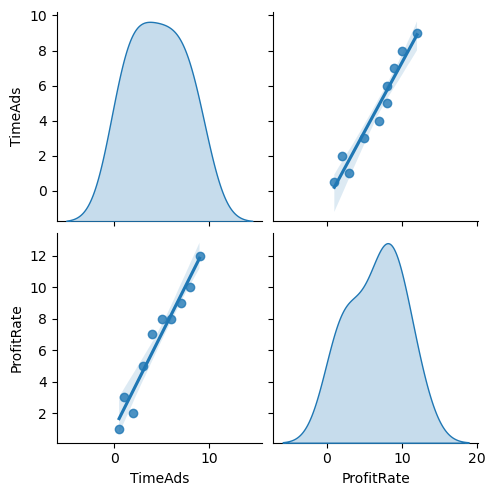

In [5]:
# Vẽ biểu đồ phân tán để xem mối quan hệ giữa TimeAds và ProfitRate
sns.pairplot(df[['TimeAds','ProfitRate']], 
             diag_kind='kde', kind='reg')
plt.show()

In [ ]:
# Bước 3: Chuẩn bị biến độc lập (X) và biến phụ thuộc (y)

In [6]:
# X là biến độc lập (TimeAds)
X = df[['TimeAds']].values

# y là biến phụ thuộc (ProfitRate)
y = df[['ProfitRate']].values

# Chuyển đổi sang kiểu số thực
X = X.astype(float)
y = y.astype(float)

In [ ]:
# Bước 4: Chia dữ liệu thành tập huấn luyện và tập kiểm thử


In [ ]:
from sklearn.model_selection import train_test_split

# Chia theo tỷ lệ 60% training và 40% testing
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.4, 
                               a                     random_state=16)


print("Dữ liệu gốc:")
print(df)

print("\nDữ liệu sau khi chia:")
print(f"Số lượng mẫu training: {len(X_train)}")
print(f"Số lượng mẫu testing: {len(X_test)}")

print("\nDữ liệu training:")
for i in range(len(X_train)):
    print(f"TimeAds: {X_train[i][0]:.1f}, ProfitRate: {y_train[i][0]:.1f}")


Dữ liệu gốc:
   TimeAds  ProfitRate
0      0.5           1
1      2.0           2
2      4.0           7
3      5.0           8
4      3.0           5
5      6.0           8
6      7.0           9
7      9.0          12
8      8.0          10
9      1.0           3

Dữ liệu sau khi chia:
Số lượng mẫu training: 6
Số lượng mẫu testing: 4

Dữ liệu training:
TimeAds: 8.0, ProfitRate: 10.0
TimeAds: 3.0, ProfitRate: 5.0
TimeAds: 5.0, ProfitRate: 8.0
TimeAds: 2.0, ProfitRate: 2.0
TimeAds: 6.0, ProfitRate: 8.0
TimeAds: 1.0, ProfitRate: 3.0


In [10]:

print("\nDữ liệu testing:")
for i in range(len(X_test)):
    print(f"TimeAds: {X_test[i][0]:.1f}, ProfitRate: {y_test[i][0]:.1f}")


Dữ liệu testing:
TimeAds: 7.0, ProfitRate: 9.0
TimeAds: 4.0, ProfitRate: 7.0
TimeAds: 0.5, ProfitRate: 1.0
TimeAds: 9.0, ProfitRate: 12.0


In [ ]:
# Bước 5: Xây dựng và huấn luyện mô hình


In [12]:
from sklearn import linear_model 

# Khởi tạo mô hình: đường thẳng có dạng: y = ax + b

model = linear_model.LinearRegression()

# Huấn luyện mô hình với dữ liệu training Mô hình sẽ học từ dữ liệu training để tìm ra: 
# Hệ số góc (a)
# Hệ số tự do (b)
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# In ra hệ số (coefficient) và hằng số (intercept)
print('Coefficients (A1):', model.coef_[0])
print('Intercept (A0):', model.intercept_[0])

# Phương trình hồi quy: ProfitRate = A0 + A1*TimeAds
print('\nPhương trình hồi quy:')
print(f'ProfitRate = {model.intercept_[0]:.4f} + {model.coef_[0][0]:.4f}*TimeAds')

Coefficients (A1): [1.14832536]
Intercept (A0): 1.2153110047846898

Phương trình hồi quy:
ProfitRate = 1.2153 + 1.1483*TimeAds


In [ ]:
# Bước 6: Đánh giá mô hình


In [17]:
import numpy as np
from sklearn import metrics

# Dự đoán trên tập test
y_test_pred = model.predict(X_test)

# Tính các chỉ số đánh giá

# Score or R-Squared: 0.9643. Đây là chỉ số đo lường mức độ phù hợp của mô hình. [0-1] -> càng gần 1 càng tốt.
print('Score or R-Squared:', model.score(X_test, y_test))

# Mean Absolute Error: Đây là sai số trung bình tuyệt đối. 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print()


Score or R-Squared: 0.9643356772543376
Mean Absolute Error: 0.6710526315789472
Root Mean Squared Error: 0.7598132826197573
Mean Absolute Percentage Error: 0.2563321181742236



<img src="./1.png"></img>
<img src="./2.png"></img>


In [ ]:
# Bước 7: Trực quan hóa kết quả


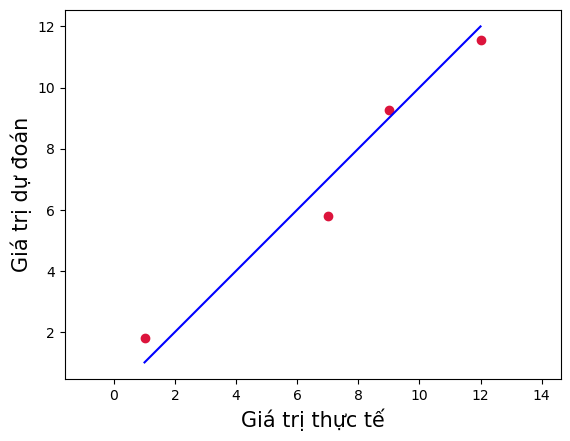

In [20]:
# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.scatter(y_test, y_test_pred, c='crimson')
p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Giá trị thực tế', fontsize=15)
plt.ylabel('Giá trị dự đoán', fontsize=15)
plt.axis('equal')
plt.show()



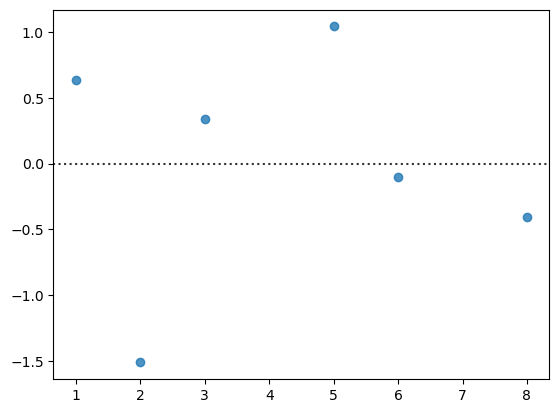

In [19]:
# Vẽ đồ thị residual
sns.residplot(x=X_train, y=y_train)
plt.show()

In [ ]:
# Bước 8: Lưu mô hình


In [21]:
import pickle
pickle.dump(model, open('model_linear_regression.sav', 'wb'))

In [ ]:
# Bước 9: Sử dụng mô hình để dự đoán


In [22]:
# Tải mô hình đã lưu
loaded_model = pickle.load(open('model_linear_regression.sav', 'rb'))

# Nhập giá trị cần dự đoán
vTimeAds = float(input('Nhập thời lượng quảng cáo: '))

# Dự đoán kết quả
predicted_ProfitRate = loaded_model.predict([[vTimeAds]])
print(f'Dự báo tỷ lệ lợi nhuận là: {predicted_ProfitRate}')

Dự báo tỷ lệ lợi nhuận là: [[3.51196172]]
